# Práctica Nro. 3

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/manuxch/calculo_avanzado/blob/main/fourier/clase_03/code/practica_03.ipynb)

En esta práctica se utiliza el módulo sympy para el cálculo simbólico y operaciones de cálculo diferencial e integral. Se puede obtener ayuda en:
- [Evaluación numérica](https://docs.sympy.org/latest/modules/evalf.html)
- [Cálculo diferencial e integral](https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html)
- [Series de Fourier](https://docs.sympy.org/latest/modules/series/fourier.html)

Primero importamos los módulos necesarios.

In [1]:
import math
import matplotlib.pyplot as plt
plt.style.use('../../../utils/clases.mplstyle') # Borrar esta línea para correr en Colab
import numpy as np
from sympy import symbols, cos, sin, integrate, pi, fourier_series, Piecewise, lambdify

## Ejercicio 1

Primero recordemos lo que significa que una función sea par o impar. 

$f(x)$ es una función impar si $f(x) = -f(-x)$, mientras que es par si $f(x) = f(-x)$. En términos de área, es fácil ver que si $f(x)$ es una función par, entonces
$$ \int_{-a}^{a} f(x) \, dx = 2 \int_0^a (f)x) \, dx $$
mientras que si $f(x)$ es impar, entonces
$$ \int_{-a}^{a} f(x) \, dx = 0 $$

![par - impar](./paridad.png)

El hecho de que $\sin mx \, \cos nx$ es una función **impar** para cualquier elección de $m$ y $n$, garantiza que
$$ \int_{-\pi}^{\pi} \sin mx \, \cos nx \, dx = 0 $$
Por lo tanto, cada miembro de la familia seno es ortogonal a cada miembro de la familia coseno.

Para mostrar que cada miembro de la familia seno es ortogonal a todo **otro** miembro de la familia seno, debemos mostrar que
$$ \int_{-\pi}^{\pi} \sin mx \, \sin nx \, dx = 0 $$
siempre que $m \neq n$ (cuando $m = n$ estamos realizando el producto interno de $\sin mx$ con si mismo).

Haciendo uso de las identidades trigonométricas:
\begin{align}
\cos(A + B) &= \cos A \, \cos B - \sin A \, \sin B \\
\cos(A - B) &= \cos A \, \cos B + \sin A \, \sin B \\
\end{align}
podemos ver que
$$ \cos(A - B) - \cos(A + B) = 2 \sin A \, \sin B$$
o
\begin{equation} 
\sin A \, \sin B = \frac{1}{2} \left[ \cos(A - B) - \cos(A + B) \right]
\tag{1.1}
\end{equation}
Del mismo modo
\begin{equation}
\cos A \, \cos B = \frac{1}{2} \left[ \cos(A + B) + \cos(A- B) \right] 
\tag{1.2}
\end{equation}

Podemos usar (1.1) con $A = mx$ y $B = nx$ para obtener
\begin{align}
\int_{-\pi}^{\pi} \sin mx \, \sin nx \, dx &= \int_{-\pi}^{\pi} \frac{1}{2} \left[ \cos(mx - nx) - \cos(mx + nx) \right] \, dx \\
&= \frac{1}{2} \int_{-\pi}^{\pi} \left[ \cos(m-n)x - \cos(m + n)x \right] \, dx
\end{align}
Entonces
\begin{equation}
\int_{-\pi}^{\pi} \sin mx \, \sin nx \, dx = \left. \frac{\sin(m - n)x}{2(m - n)} \right|_{x = -\pi}^{\pi} - \left. \frac{\sin(m + n)x}{2(m + n)} \right|_{x = -\pi}^{\pi}
\tag{1.3}
\end{equation}

Dado que $m$ y $n$ son enteros, también lo son $m + n$ y $m - n$, y dado que el seno de múltiplos enteros de $\pm \pi$ es cero, concluimos que el lado derecho de (1.3) es $0$. Por lo tanto, para $m \neq n$:
\begin{equation}
\int_{-\pi}^{\pi} \sin mx \, \sin nx \, dx = 0 
\tag{1.4}
\end{equation}

El primer término del lado derecho de (1.3) contiene $m - n$ en el denominador, por lo que esa expresión es inválida cuando $m = n$. En ese caso
\begin{align}
\int_{-\pi}^{\pi} \sin mx \, \sin nx \, dx &= \int_{-\pi}^{\pi} \sin^2 nx \, dx = \int_{-\pi}^{\pi} \frac{1 - \cos 2nx}{2} \, dx \\
&= \left. \frac{x}{2} \right|_{-\pi}^{\pi} - \left. \frac{\sin 2nx}{4n} \right|_{-\pi}^{\pi} = \frac{\pi}{2} - \frac{-\pi}{2} + 0 = \pi \tag{1.5}
\end{align}

Entonces, considerando todos los casos:
\begin{equation}
\int_{-\pi}^{\pi} \sin mx \, \sin nx \, dx = 
\begin{cases}
0,& \text{ si } m \neq n \\
\pi,& \text{ si } m = n 
\end{cases}
\tag{1.6}
\end{equation}



**Nota:** El hecho de que $n$ aparece como un factor en un término del denominador del lado derecho de (1.5) nos cuestiona sobre la validad de (1.5). Sin embargo, si $n = 0$, $\sin nx = 0$. Es por esto que la familia $\{\sin nx\}$ comienza con $n = 1$ en vez de $n = 0$. Por otro lado, cuando $n = 0$, $\cos nx = 1$.

Ahora nos queda centrar la atención en 
$$ \int_{-\pi}^{\pi} \cos mx \, \cos nx \, dx, \quad \text{ cuando } m \neq n $$

De la ecuación (1.2) tenemos
\begin{align}
\int_{-\pi}^{\pi} \cos mx \, \cos nx \, dx &= \frac{1}{2} \int_{-\pi}^{\pi} \left[(\cos(m + n)x + \cos(m - n)x \right] \, dx \\
&= \left. \frac{\sin(m + n)x}{2(m + n)} \right|_{x = -\pi}^{\pi} + \left. \frac{\sin(m - n)x}{2(m - n)} \right|_{x = -\pi}^{\pi}
\tag{1.7}
\end{align}

Dado que $\sin(m + n)\pi = 0$, de (1.7) resulta que
\begin{equation}
n \neq m \rightarrow \int_{-\pi}^{\pi} \cos mx \, \cos nx \, dx = 0
\tag{1.8}
\end{equation}

Todo lo que queda para completar todos los casos es calcular
$$ \int_{-\pi}^{\pi} \cos^2 nx \, dx $$
aún cuando esto no es necesario para resolver el ejercicio. Dado que
$$ \cos^2 nx = \frac{1 + \cos 2nx}{2} $$
tenemos que
\begin{align}
\int_{-\pi}^{\pi} \cos^2 nx \, dx &= \frac{1}{2} \int_{-\pi}^{\pi} (1 - \cos 2nx) \, dx \\
&= \frac{1}{2} \left[ x - \frac{\sin 2nx}{2 n} \right]_{x = -\pi}^{\pi} \\
&= \pi
\tag{1.9}
\end{align}
**excepto** que la ecuación (1.9) no es válida cuando $n = 0$. Es ese caso especial tenemos
$$ \int_{-\pi}^{\pi} \cos^2 nx \, dx = \int_{-\pi}^{\pi}  dx = 2 \pi $$

En resumen, para cada par de enteros $m$ y $n$, tenemos:
\begin{equation}
\int_{-\pi}^{\pi} \sin^2 nx \, dx =
\begin{cases}
0,& \text{ si } n = 0 \\
\pi,& \text{ si } n \neq 0 
\end{cases}
\tag{1.10}
\end{equation}

\begin{equation}
\int_{-\pi}^{\pi} \cos^2 nx \, dx =
\begin{cases}
2 \pi,& \text{ si } n = 0 \\
\phantom{2}\pi,& \text{ si } n \neq 0 
\end{cases}
\tag{1.11}
\end{equation}

\begin{equation}
\int_{-\pi}^{\pi} \sin mx \cos nx \, dx = 0 \quad \text{ aún si } m = n
\tag{1.12}
\end{equation}

\begin{equation}
\int_{-\pi}^{\pi} \sin mx \sin nx \, dx = \int_{-\pi}^{\pi} \cos mx \cos nx \, dx = 0 \quad \text{ cuando } m \neq n
\tag{1.13}
\end{equation}

En particular, si $\langle f, g \rangle$ significa
$$\int_{-\pi}^{\pi} f(x) \, g(x) \, dx $$
entonces la familia
$$ \{1, \cos x, \cos 2x, \ldots, \cos nx, \ldots, \sin x, \sin 2x, \ldots, \sin nx, \ldots \} $$
es ortogonal. Si queremos construir una famila **ortonormal**, lo que estamos requiriendo es que el producto de un elemento del conjunto por si mismo, cuando no se anule, resulte $1$. En este caso, a partir de (1.10) y (1.11), nuestra familia de funciones debería ser:
$$ \left\{ \frac{1}{\sqrt{2 \pi}}, \frac{1}{\sqrt{\pi}} \cos x, \frac{1}{\sqrt{\pi}} \cos 2x, \ldots, \frac{1}{\sqrt{\pi}} \cos nx, \ldots, \frac{1}{\sqrt{\pi}} \sin x, \frac{1}{\sqrt{\pi}} \sin 2x, \ldots, \frac{1}{\sqrt{\pi}}\sin nx, \ldots \right\} $$

Haciendo uso de las funcionalidades simbólicas de SymPy, podemos obtener los valores de los productos internos de los elementos de la familia de senos y cosenos:

In [2]:
m, n = symbols('m n', integer=True)
x = symbols('x', real=True)

In [3]:
# coseno m = n
integrate(cos(n*x)**2,(x, -pi, pi))

Piecewise((pi, Ne(n, 0)), (2*pi, True))

In [4]:
# coseno m != n
m, n = symbols('m n', integer=True, positive=True)
integrate(cos(m*x) * cos(n*x),(x, -pi, pi))

Piecewise((0, Ne(m, n)), (pi, True))

En la celda anterior, al declarar `m` y `n`, además de establecer que son enteros también indicamos que son positivos. De esta manera al evaluar la integral, SymPy descarta los casos en que algunas de estas variables se anulan, o cuando $m = -n$. Para ver qué ocurre si eliminamos la restricción `positive=True`, sugerimos volver a ejecutar esta celda eliminando la restricción en el argumento de la función `integrate`.

In [5]:
# seno m = n
integrate(sin(n*x)**2,(x, -pi, pi))

pi

In [6]:
# seno m != n
integrate(sin(m*x) * sin(n*x),(x, -pi, pi))

Piecewise((0, Ne(m, n)), (pi, True))

In [7]:
# seno x coseno
integrate(sin(m*x) * cos(n*x),(x, -pi, pi))

0

De este modo, recuperamos utilizando el cálculo simbólico de SymPy, los resultados de las ecuaciones (1.19) - (1.13).

## Ejercicio 2

Tenemos la suposición que:
\begin{equation}
f(x) = a_0 + \sum_{n = 1}^{\infty} a_n \cos nx + \sum_{n = 1}^{\infty} b_n \sin nx 
\tag{2.1}
\end{equation}

Dado que $\langle 1, \cos nx \rangle = \langle 1, \sin nx \rangle = 0$ para $n >0$, podemos usar esta propiedad ortogonal para encontrar $a_0$. Integramos entonces ambos lados de (2.1) entre $-\pi $ y $\pi$ para obtener:
\begin{equation}
\int_{-\pi}^{\pi} f(x) \, dx = \int_{-\pi}^{\pi} \left[ a_0 + \sum_{n = 1}^{\infty} a_n \cos nx + \sum_{n = 1}^{\infty} b_n \sin nx \right] \, dx
\tag{2.2}
\end{equation}

**Asumiendo** que podemos intercambiar el orden de integración y sumatorias (lo que para sumas infinitas no siempre es válido), la ecuación (2.2) resulta
\begin{equation}
\int_{-\pi}^{\pi} f(x) \, dx = \int_{-\pi}^{\pi} a_0 \, dx + \sum_{n = 1}^{\infty} \int_{-\pi}^{\pi} a_n \cos nx \, dx + \sum_{n = 1}^{\infty} \int_{-\pi}^{\pi} b_n \sin nx \, dx
\end{equation}
Por lo tanto
$$ \int_{-\pi}^{\pi} f(x) \, dx = 2 \pi a_0 $$
o 
\begin{equation}
a_0 = \frac{1}{2 \pi} \int_{-\pi}^{\pi} f(x) \, dx
\tag{2.3}
\end{equation}


Para encontrar $a_k$ para $k \neq 0$, multiplicamos ambos lados de (2.1) por $\cos kx$ e integramos desde $-\pi$ a $\pi$:
\begin{align}
\int_{-\pi}^{\pi} f(x) \, \cos kx \, dx &= \int_{-\pi}^{\pi} \left[ a_0 + \sum_{n = 1}^{\infty} a_n \cos nx + \sum_{n = 1}^{\infty} b_n \sin nx \right] \, \cos kx\, dx \\
&= \int_{-\pi}^{\pi} a_0 \, \cos kx \, dx + \int_{-\pi}^{\pi} \left[ \sum_{n = 1}^{\infty} a_n \cos nx \, cos kx \right] \, dx \\
&+ \int_{-\pi}^{\pi} \left[ \sum_{n = 1}^{\infty} b_n \sin nx \, cos kx \right] \, dx
\tag{2.4}
\end{align}

Nuevamente, bajo la suposición de que podemos intercambiar el orden de integración con las sumas infinitas, tenemos:
\begin{align}
\int_{-\pi}^{\pi} f(x) \, \cos kx \, dx &= \int_{-\pi}^{\pi} a_0 \, \cos kx \, dx + \sum_{n = 1}^{\infty} a_n \int_{-\pi}^{\pi} \cos nx \, cos kx \, dx \\
&+ \sum_{n = 1}^{\infty}  \int_{-\pi}^{\pi} b_n \sin nx \, cos kx \, dx \\
&= 0 + \pi \delta_{nk} + 0
\end{align}

donde usamos la función delta de Kronecker:
$$ \delta_{ij} = 
\begin{cases}
1,& \text{ si } i = j \\
0,& \text{ si } i \neq j
\end{cases} $$

Entonces
$$ \int_{-\pi}^{\pi} f(x) \, \cos kx \, dx = \pi a_k $$
Por lo tanto, para $k = 1, 2, 3, \ldots$:
\begin{equation}
a_k = \frac{1}{\pi}  \int_{-\pi}^{\pi} f(x) \, \cos kx \, dx
\tag{2.5}
\end{equation}

Para encontrar $b_k$ multiplicamos ambos lados de (2.1) por $\sin kx$ e integramos de $-\pi$ a $\pi$, asumiendo que podemos intercambiar el orden de la suma infinita y la integración. Esto resulta:
\begin{align}
\int_{-\pi}^{\pi} f(x) \, \sin kx \, dx &= \int_{-\pi}^{\pi} a_0 \, \sin kx \, dx + \sum_{n = 1}^{\infty} a_n \int_{-\pi}^{\pi} \cos nx \, \sin kx \,dx \\
&+ \sum_{n = 1}^{\infty} \int_{-\pi}^{\pi} b_n \sin nx \, \sin kx \, dx \\
&= 0 + 0 + \pi \delta_{nk}
\end{align}

Entonces
$$ \int_{-\pi}^{\pi} f(x) \, \sin kx \, dx = b_k \pi $$
o
\begin{equation}
b_k = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \, \sin kx \, dx
\tag{2.6}
\end{equation}

**Nota 1:** usamos $k$ en vez de $n$ simplemente para evitar confundir un término particular con uno general. Esto es, no queremos que $n$ tenga dos interpretaciones diferentes en el mismo problema. Con esto en mente, las ecuaciones (2.5) y (2.6) se pueden reescribir como:
\begin{equation}
a_n = \frac{1}{\pi}  \int_{-\pi}^{\pi} f(x) \, \cos nx \, dx
\tag{2.5'}
\end{equation}
y
\begin{equation}
b_n = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \, \sin nx \, dx
\tag{2.6'}
\end{equation}

**Nota 2:** Notar que **no** decimos que
\begin{align}
f(x) &= a_0 + \sum_{n = 1}^{\infty} a_n \cos nx + \sum_{n = 1}^{\infty} b_n \sin nx \\
&= \frac{1}{2 \pi} \int_{-\pi}^{\pi} f(x) \, dx + \frac{1}{\pi} \sum_{n = 1}^{\infty} \left( \int_{-\pi}^{\pi} f(x) \, \cos nx \, dx \right) \cos nx \\
&+ \frac{1}{\pi} \sum_{n = 1}^{\infty} \left( \int_{-\pi}^{\pi} f(x) \, \sin nx \, dx \right) \sin nx
\tag{1.7}
\end{align}

sino que es $F(x)$ la que está definida por el lado derecho de la ecuación (2.7). En otras palabras, el lado derecho de la ecuación (2.7) fue derivada bajo la suposición (no siempre válida) de que está justificado el cambio de orden de integración y sima infinita. En resumen
\begin{align}
f(x) &\sim \frac{1}{2 \pi} \int_{-\pi}^{\pi} f(x) \, dx + \frac{1}{\pi} \sum_{n = 1}^{\infty} \left[ \left( \int_{-\pi}^{\pi} f(x) \, \cos nx \, dx \right) \cos nx \right. \\
&+ \left. \left( \int_{-\pi}^{\pi} f(x) \, \sin nx \, dx \right) \sin nx \right]= F(x)
\end{align}
y $F(x)$ se denomina la representación de Fourier de $f(x)$,

## Ejercicio 3

En el ejercicio anterior calculamos los coeficientes de Fourier de una función $f(x)$ enfatizando el hecho de que la serie de Fourier no es necesariamente igual a la función. Por otro lado, en la clase dijimos que si $f(x)$ es suave a tramos en $[-\pi, \pi]$, la serie de Fourier $F(x)$ de $f(x)$ converge a $f(x)$ en todos los puntos del intervalo $[-\pi, \pi]$ donde $f(x)$ es continua, y al valor medio del salto donde $f(x)$ tiene una discontinuidad finita.

En este ejercicio calcularemos nuevamente los coeficientes de la serie de Fourier, pero al mismo tiempo elegimos $f(x)$ como una función suave a tramos de modo de ver cómo converge la serie de Fourier en este caso.

### Parte a)

Dado que
\begin{equation}
f(x) = 
\begin{cases}
-1,& -\pi < x < 0 \\
\phantom{-}1,& \phantom{-}0 < x < \pi \\
\end{cases}
\tag{3.1}
\end{equation}
tenemos que:

\begin{align}
\text{(i)} \qquad \int_{-\pi}^{\pi} f(x) \, dx &= \int_{-\pi}^{0} f(x) \, dx + \int_{0}^{\pi} f(x) \, dx \tag{3.2} \\
&= \int_{-\pi}^{0} (-1) \, dx + \int_{0}^{\pi} 1 \, dx \\
&= \int_{0}^{-\pi} dx + \int_{0}^{\pi} dx \\
&= -\pi + \pi \\
&= 0
\tag{3.3}
\end{align}

\begin{align}
\text{(ii)} \qquad \int_{-\pi}^{\pi} f(x) \, \cos nx \, dx &= \int_{-\pi}^{0} -\cos nx \, dx + \int_{0}^{\pi} \cos nx \, dx \quad (n \neq 0) \\
&= \int_{0}^{-\pi} \cos nx \, dx + \int_{0}^{\pi} \cos nx \, dx \\
&= \left. \frac{\sin nx}{n} \right|_{x = 0}^{-\pi} + \left. \frac{\sin nx}{n} \right|_{x = 0}^{\pi} \\
&= 0
\tag{3.4}
\end{align}

\begin{align}
\text{(iii)} \qquad \int_{-\pi}^{\pi} f(x) \, \sin nx \, dx &= \int_{-\pi}^{0} -\sin nx \, dx + \int_{0}^{\pi} \sin nx \, dx \quad (n \neq 0) \\
&= \int_{0}^{-\pi} \sin nx \, dx + \int_{0}^{\pi} \sin nx \, dx \\
&= \left. \frac{-\cos nx}{n} \right|_{x = 0}^{-\pi} - \left. \frac{\cos nx}{n} \right|_{x = 0}^{\pi} \\
&= \left( \frac{-\cos(-n \pi)}{n} - \left[ \frac{-\cos 0}{n} \right] \right) - \left( \frac{\cos n \pi}{n} - \frac{\cos 0}{n} \right) \\
&= \frac{-\cos n \pi}{n} + \frac{1}{n} - \frac{\cos n \pi}{n} + \frac{1}{n} \\
&= \frac{2}{n} - \frac{2 \cos n \pi}{n}
\tag{3.5}
\end{align}

Podemos observar que para valores pares de $n$, $\cos n\pi = 1$, mientras que para los valores impares de $n$, $\cos n\pi = -1$. Por lo tanto
$$ \frac{2}{n} - \frac{2 \cos n \pi}{n} = 
\begin{cases}
\frac{2}{n} - \frac{2}{n},& \text{ cuando } n \text { es par} \\
\frac{2}{n} - \frac{-2}{n} = \frac{4}{n},& \text{ cuando } n \text { es impar} \\
\end{cases} $$
Por lo tanto, concluimos de (3.5) que
\begin{equation}
\int_{-\pi}^{\pi} f(x) \, \sin nx \, dx =
\begin{cases}
0,& \text{ si } n \text{ es  par} \\
\frac{4}{n},& \text{ si } n \text{ es  impar} \\
\end{cases}
\tag{3.6}
\end{equation}

Ahora, usando los resultados del ejercicio anterior, tenemos que la representación en serie de Fourier de $f(x)$ está dada por
\begin{equation}
F(x) = a_0 + \sum_{n = 1}^{\infty} a_n \, \cos nx + \sum_{n = 1}^{\infty} b_n \, \sin nx 
\tag{3.7}
\end{equation}
donde
$$ a_0 = \frac{1}{2 \pi}  \int_{-\pi}^{\pi} f(x) \, dx $$
$$ a_n = \frac{1}{\pi}  \int_{-\pi}^{\pi} f(x) \, \cos nx \, dx \qquad (n \neq 0) $$
$$ b_n = \frac{1}{\pi}  \int_{-\pi}^{\pi} f(x) \, \sin nx \, dx \qquad $$

Entonces, de (3.3), (3.4) y (3.6) concluimos que
$$ a_0 = \frac{1}{2 \pi} (0) = 0 $$
$$ a_n = \frac{1}{\pi} (0) = 0 \qquad (n \neq 0) $$
$$ b_n =
\begin{cases}
\frac{1}{\pi} (0) = 0,& \text{ si } n \text{ es par} \\
\frac{1}{\pi} \frac{4}{n} = \frac{4}{n \pi},& \text{ si } n \text{ es impar} \\
\end{cases} $$

lo que a partir de (3.7) resulta:
\begin{align}
F(x) &= 0 + 0 + \sum_{n \text{ impar}} \frac{4}{n \pi} \sin nx \tag{3.8.1} \\
&= \frac{4}{\pi} \left( \sin x + \frac{\sin 3x}{3} + \frac{\sin 5 x}{5} + \cdots + \frac{\sin (2n + 1) x}{2n + 1} + \cdots \right) \tag{3.8.2} \\
&= \frac{4}{\pi} \sum_{n = 0}^{\infty} \frac{\sin (2n +1)x}{2 n +1} \tag{3.8.3} \\
\end{align}

El módulo SymPy de Python provee funciones para generar y manipular series de Fourier. Para ver en este ejercicio cómo podemos obtener la serie de Fourier de la función dada, primero tenemos que definir $f(x)$ como una función suave a tramos:

In [8]:
x = symbols('x', real=True)
f = Piecewise((-1, x < 0), (1, True)) # True significa: de otro modo

Ahora podemos generar la función $F(x)$ como la representación en serie de Fourier de $f(x)$:

In [9]:
F = fourier_series(f, (x, -pi, pi))
F

FourierSeries(Piecewise((-1, x < 0), (1, True)), (x, -pi, pi), (0, SeqFormula(0, (_n, 1, oo)), SeqFormula(Piecewise((-2*cos(_n*pi)/_n + 2/_n, (_n > -oo) & (_n < oo) & Ne(_n, 0)), (0, True))*sin(_n*x)/pi, (_n, 1, oo))))

Como podemos ver, esta expansión coicide con el resultado obtenido en las ecuaciones (3.8). Podemos ejecutar el método `truncate()` para obtener más términos de la serie:

In [10]:
F.truncate(n=8)

4*sin(x)/pi + 4*sin(3*x)/(3*pi) + 4*sin(5*x)/(5*pi) + 4*sin(7*x)/(7*pi) + 4*sin(9*x)/(9*pi) + 4*sin(11*x)/(11*pi) + 4*sin(13*x)/(13*pi) + 4*sin(15*x)/(15*pi)

Para comparar $f(x)$ con $F(x)$ en forma gráfica, antes tenemos que convertir las funciones simbólicas de SymPy en funciones numéricas que se puedan tratar como arrays de numpy. Esto se logra invocando la función `lambdify`:

In [11]:
f_np = lambdify(x, f, 'numpy')
F_np = lambdify(x, F.truncate(n=5), 'numpy')  # tomamos los primeros 5 términos de la serie de Fourier

Ahora graficamos la función $f(x)$ y $F(x)$:

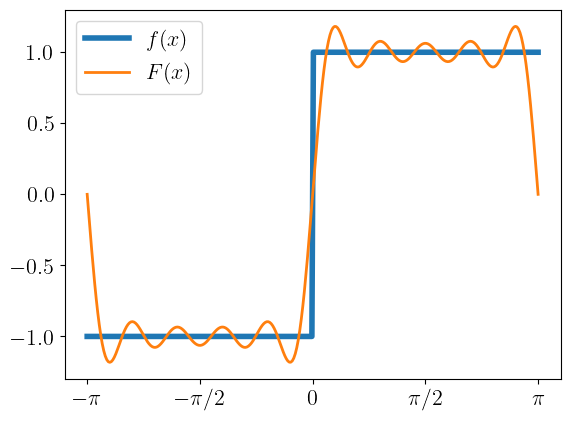

In [12]:
fig, ax = plt.subplots() 
x_n = np.linspace(-np.pi, np.pi, 300)
y = f_np(x_n)
Y = F_np(x_n)
plt.plot(x_n, y, lw=4, label=r"$f(x)$")
plt.plot(x_n, Y, label=r"$F(x)$")
ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_xticklabels(['$-\pi$', '$-\pi/2$', '$0$', '$\pi/2$', '$\pi$'])
plt.legend()
plt.show()

**Nota 1:** Notar que el resultado obtenido, por ejemplo (3.8.2), contiene solo términos seno. Esto ocurre porque en este ejercicio $f(x)$ es una **función par**. En otras palabras, dado que el producto de una función impar y una función par es impar, $f(x) \, \cos nx$ es impar, ya que $f(x)$ es impar y $\cos nx$ es par. En consecuencia
$$ \int_{-\pi}^{\pi} f(x) \, \cos nx \, dx = 0 $$

De la misma forma, $\langle f(x), \sin nx \rangle = 0$ cuando $f(x)$ es par. Por lo tanto, la representación en serie de Fourier de $f(x)$ será una función exclusivamente con senos cuando $f(x)$ es impar, y exclusivamente con cosenos cuando $f(x)$ es par. De hecho podríamos haber utilizado este hecho al derivar las ecuaciones (3.3), (3.4) y (3.6) para simplificar el cálculo, dado que como $f(x)$ es impar:
$$ \int_{-\pi}^{\pi} f(x) \, \cos nx \, dx = 0 $$
mientras que
$$ \int_{-\pi}^{\pi} f(x) \, \sin nx \, dx = 2 \int_{0}^{\pi} f(x) \, \sin nx \, dx $$

**Nota 2:** dado que $\frac{f(x) + f(-x)}{2}$ es **siempre** una función par, y $\frac{f(x) - f(-x)}{2}$ es **siempre** una función impar, la identidad
$$ f(x) = \underbrace{\frac{f(x) + f(-x)}{2}}_{\text{par}} + \underbrace{\frac{f(x) - f(-x)}{2}}_{\text{impar}} $$
nos dice que siempre podemos descomponer la construcción de una serie de Fourier en dos problemas, uno involucrando una serie de senos y el otro de cosenos.

### Parte b)

La teoría indica que en cada $x \in (-\pi, \pi)$ para el cual $f(x)$ es continua, $F(x) = f(x)$. En particular, $x = \tfrac{\pi}{2}$ es un punto que cumple esa condición. Ahora, por definición de $f$, cuando $x = \tfrac{\pi}{2}$, $f(x) = 1$ (dado que $0 < \tfrac{\pi}{2} < \pi$). Entonces, $F(\tfrac{\pi}{2}) = 1$, y concluimos a partir de la ecuación (3.8.3) que
\begin{equation}
1 = \frac{4}{\pi} \sum_{n = 0}^{\infty} \frac{\sin(2n + 1)x}{2n + 1}
\tag{3.9}
\end{equation}
Ahora, los múltiplos impares de $\tfrac{\pi}{2}$ tienen la propiedad de que su seno es $1$ o $-1$. Específicamente
$$ \sin \frac{\pi}{2} = \sin \frac{5 \pi}{2} = \sin \frac{9 \pi}{2} = \cdots = 1 $$
mientras que
$$ \sin \frac{3 \pi}{2} = \sin \frac{7 \pi}{2} = \sin \frac{11 \pi}{2} = \cdots = -1 $$
En forma más compacta:
$$ \sin (2n + 1) \frac{\pi}{2} = 
\begin{cases}
\phantom{-}1,& n \text{ par} \\
-1,& n \text{ impar} \\
\end{cases} $$

Por lo tanto, la ecuación (3.9) puede reescribirse como
$$ 1 = \frac{4}{\pi} \left( 1 - \frac{1}{3} + \frac{1}{5} - \frac{1}{7} + \frac{1}{9} - \frac{1}{11} + \cdots \right) $$
de lo que sigue que
\begin{equation}
\sum_{n = 0}^{\infty} \frac{(-1)^n}{2n + 1} = 1 - \frac{1}{3} + \frac{1}{5} - \frac{1}{7} + \frac{1}{9} - \frac{1}{11} + \cdots = \frac{\pi}{4}
\tag{3.10}
\end{equation}

**Nota 3:** en el mismo contexto, notar que $f(0^-) = -1$ y $f(0^+) = 1$. Por lo tanto, la teoría general predice que
$$ F(0) = \frac{f(0^+) + f(0^-)}{2} = \frac{1 + (-1)}{2} = 0 $$

Como verificación de este resultado, vemos que con $x = 0$ en la ecuación (3.8) [o (3.8.1), (3.8.2), (3.8.3)], obtenemos
$$ F(0) = 0 $$

## Ejercicio 4

### Parte a)

$f(x) = |x|$ para $-\pi \leq x \leq \pi$ significa que
$$ f(x) = 
\begin{cases}
\phantom{-}x,& \quad \phantom{-}0 \leq x \leq \pi \\
-x,& \quad -\pi \leq x \leq 0
\end{cases} $$

Por lo tanto:
\begin{align}
\langle f(x), 1 \rangle = \int_{-\pi}^{\pi} f(x) \, dx &= \int_{-\pi}^{0} (-x) \, dx + \int_{0}^{\pi} x \, dx \\
&= 2 \int_{0}^{\pi} x \, dx = \left. x^2 \right|_{0}^{\pi} \\
&= \pi^2
\end{align}

En consecuencia
\begin{equation}
a_0 = \frac{\langle f(x), 1 \rangle}{\langle 1, 1 \rangle} = \frac{1}{2 \pi} \int_{-\pi}^{\pi} f(x) \, dx = \frac{\pi}{2}
\tag{4.1}
\end{equation}

Del mismo modo, dado que $f(x)$ es una función **par**:
\begin{align}
a_n &= \frac{\langle f(x), \cos nx \rangle}{\langle \cos nx, \cos nx \rangle} = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \, \cos nx \, dx \qquad (n \neq 0) \\
&= \frac{2}{\pi} \int_{0}^{\pi} x \, \cos nx \, dx
\tag{4.2}
\end{align}

Donde hemos usado el resultado (1.11) para $\langle \cos nx, \cos nx \rangle = \pi, \; (n \neq 0)$. La integral en (4.2) se puede integrar por partes, usando alguna tabla, o aprovechando que tenemos SymPy:

In [13]:
x = symbols('x', real=True)
n = symbols('n', integer=True)
integrate(x * cos(n * x), (x, 0, pi))

Piecewise(((-1)**n/n**2 - 1/n**2, Ne(n, 0)), (pi**2/2, True))

Notar que si $n = 0$ recuperamos el resultado de (4.2). Para $n \neq 0$, tenemos que
$$ \int_0^{\pi} x \, \cos nx \, dx = 
\begin{cases}
\phantom{-}0,& \qquad n \text{ par} \\
\frac{-2}{n^2},& \qquad n \text{ impar} \\
\end{cases} $$

Por lo tanto, de (4.2) obtenemos
\begin{equation}
a_n = 
\begin{cases}
\frac{2}{\pi} (0) = 0,& \qquad n \text{ par} \\
\frac{2}{\pi} \frac{-2}{n^2} = -\frac{4}{n^2 \pi},& \qquad n \text{ impar} \\
\end{cases}
\tag{4.3}
\end{equation}

Finalmente, dado que $f(x)$ es par, $f(x) \, \sin nx$ es impar, entonces:
$$ \langle f(x), \sin nx \rangle = \int_{-\pi}^{\pi} f(x) \, \sin nx \, dx = 0 $$
lo que significa que 
\begin{equation}
b_n = 0, \text{ para } n = 1, 2, 3, \cdots
\tag{4.4}
\end{equation}

De (4.1), (4.3) y (4.4), concluimos que
\begin{align}
F(x) &= a_0 + \sum_{n = 1}^{\infty} a_n \cos nx + \sum_{n = 1}^{\infty} b_n \sin nx \\
&= \frac{\pi}{2} + \sum_{n \text{ impar}} -\frac{4}{n^2 \pi} \cos nx + 0 \\
&= \frac{\pi}{2} - \frac{4}{\pi} \sum_{n \text{ impar}} \frac{\cos nx}{n^2} \\
&= \frac{\pi}{2} - \frac{4}{\pi} \sum_{n = 1}^{\infty} \frac{\cos (2 n + 1)x}{(2 n + 1)^2}
\tag{4.5}
\end{align}

In [14]:
f = Piecewise((-x, x < 0), (x, True)) # True significa: de otro modo
F = fourier_series(f, (x, -pi, pi))
F

FourierSeries(Piecewise((-x, x < 0), (x, True)), (x, -pi, pi), (pi/2, SeqFormula(Piecewise((2*pi*sin(_n*pi)/_n + 2*cos(_n*pi)/_n**2 - 2/_n**2, (_n > -oo) & (_n < oo) & Ne(_n, 0)), (pi**2, True))*cos(_n*x)/pi, (_n, 1, oo)), SeqFormula(0, (_n, 1, oo))))

In [15]:
F.truncate(n=8)

-4*cos(x)/pi - 4*cos(3*x)/(9*pi) - 4*cos(5*x)/(25*pi) - 4*cos(7*x)/(49*pi) - 4*cos(9*x)/(81*pi) - 4*cos(11*x)/(121*pi) - 4*cos(13*x)/(169*pi) + pi/2

Como hicimos en el ejercicio 3, graficamos $f(x)$ y los primeros términos de $F(x)$ para apreciar el grado de aproximación de la representación de Fourier de $f$:

In [16]:
f_np = lambdify(x, f, 'numpy')
F_np = lambdify(x, F.truncate(n=5), 'numpy')  # tomamos los primeros 5 términos de la serie de Fourier

Dado que la función $F(x)$ es periódica, con período $2 \pi$, extendemos el intervalo en que graficamos esta función para verificar esta propiedad:

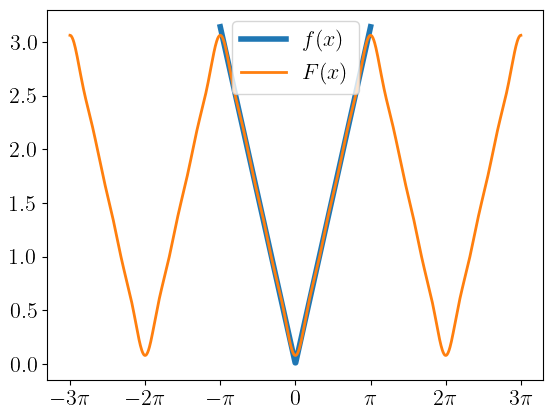

In [17]:
fig, ax = plt.subplots() 
x_n = np.linspace(-np.pi, np.pi, 300)
x_ext = np.linspace(-3 * np.pi, 3 * np.pi, 1000)
y = f_np(x_n)
Y = F_np(x_ext)
plt.plot(x_n, y, lw=4, label=r"$f(x)$")
plt.plot(x_ext, Y, label=r"$F(x)$")
ax.set_xticks([-3 * np.pi, -2 * np.pi, -np.pi, 0, np.pi, 2 * np.pi, 3 * np.pi])
ax.set_xticklabels(['$-3 \pi$', '$-2 \pi$','$-\pi$','$0$', '$\pi$', '$2 \pi$','$3 \pi$'])
plt.legend()
plt.show()

### Parte b)

Dado que $f(x) = |x|$ implica que $f$ es suave por tramos en $[-\pi, \pi]$, concluimos que $F(x) = f(x)$ excepto en aquellos puntos en los cuales $f$ es discontinua. Pero dado que $f$ es continua en todo el intervalo $[-\pi, \pi]$, $f(x) \equiv F(x)$ en $[-\pi, \pi]$.

Entonces, si hacemos $x = \pi$ en (4.6) y observamos que $f(\pi) = |\pi| = \pi$, obtenemos
\begin{equation}
\pi = \frac{\pi}{2} - \frac{4}{\pi} \sum_{n = 1}^{\infty} \frac{\cos (2 n + 1) \pi }{(2 n + 1)^2}
\tag{4.6}
\end{equation}

Sabemos que $\cos(2 n + 1) \pi = -1$ para todo $n$ (es decir, todos los múltiplos impares de $\pi$ tienen sus cosenos igual a $-1$), por lo que de (4.6)
$$ \pi = \frac{\pi}{2} - \frac{4}{\pi} \sum_{n = 1}^{\infty} \frac{-1 }{(2 n + 1)^2} $$
o
\begin{equation}
\pi = \frac{\pi}{2} + \frac{4}{\pi} \sum_{n = 1}^{\infty} \frac{1}{(2 n + 1)^2}
\tag{4.7}
\end{equation}

De (4.7) sique que
$$ \frac{\pi}{2} = \frac{4}{\pi} \sum_{n = 1}^{\infty} \frac{1}{(2 n + 1)^2} $$
o
$$ \sum_{n = 1}^{\infty} \frac{1}{(2 n + 1)^2} = \frac{\pi^2}{8} $$

Extendiendo la suma
$$ 1 + \frac{1}{3^2} + \frac{1}{5^2} + \frac{1}{7^2} + \cdots  + \frac{1}{(2 n + 1)^2} + \cdots = \frac{\pi^2}{8} $$

## Ejercicio 5

### Parte a)

Dado que 
$$ f(x) =
\begin{cases}
0,& -\pi < x \leq 0 \\
x^2,& 0 \leq x < \pi
\end{cases} $$
tenemos que
\begin{align}
\langle f(x), 1 \rangle = \int_{-\pi}^{\pi} f(x) \, dx &= \int_{-\pi}^{0} 0 \, dx + \int_{0}^{\pi} x \, dx \\
&= 0 + \left. \frac{1}{3}x^3 \right|_{0}^{\pi} \\
&= \frac{pi^3}{3}
\end{align}

Por lo tanto
\begin{equation}
a_0 = \frac{\langle f(x), 1 \rangle}{\langle 1, 1 \rangle} = \frac{1}{2 \pi} \int_{-\pi}^{\pi} f(x) \, dx = \frac{\pi}{2} \left( \frac{\pi^3}{3} \right) = \frac{\pi^2}{6}
\tag{5.1}
\end{equation}

Para los productos con la familia de cosenos, tenemos que evaluar:
\begin{align}
\int_{-\pi}^{\pi} f(x) \, \cos nx \, dx &= \int_{-\pi}^{\pi} 0 \, \cos nx \, dx + \int_{-\pi}^{\pi} x^2 \, \cos nx \, dx \qquad (n \neq 0) \\
&= \int_{0}^{\pi} x^2 \, \cos nx \, dx
\end{align}

por lo que para $n \neq 0$ tenemos
\begin{align}
a_n &= \frac{\langle f(x), \cos nx \rangle}{\langle \cos nx, \cos nx \rangle} = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \, \cos nx \, dx \\
&= \frac{1}{\pi} \int_{0}^{\pi} x^2 \, \cos nx \, dx
\tag{5.2}
\end{align}

Podemos integrar por partes (dos veces) la integral de la ecuación (4.2), pero haremos uso de la capacidad de integración de SymPy:

In [18]:
x = symbols('x', real=True)
n = symbols('n', integer=True, positive=True)  # Positive para descartar n = 0
integrate(x**2 * cos(n * x), (x, 0, pi))

2*(-1)**n*pi/n**2

Entonces, $a_n$ resulta
\begin{equation}
a_n = \frac{2 (-1)^n}{n^2}
\tag{5.3}
\end{equation}

Del mismo modo, para las funciones de la familia seno:
\begin{align}
b_n &= \frac{\langle f(x), \sin nx \rangle}{\langle \sin nx, \sin nx \rangle} = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \, \sin nx \, dx \\
&= \frac{1}{\pi} \int_{0}^{\pi} x^2 \, \sin nx \, dx
\tag{5.4}
\end{align}

Nuevamente apelamos al poder integrador de SymPy para evitarnos el álgebra de integrar por partes:

In [19]:
integrate(x**2 * sin(n * x), (x, 0, pi))

-(-1)**n*pi**2/n + 2*(-1)**n/n**3 - 2/n**3

Considerando que tenemos potencias de $-1$ a la $n$, podemos simplificar la expresión anterior para los casos en que $n$ es par o impar, por lo que (4.4) queda:
\begin{equation}
b_n = 
\begin{cases}
-\frac{\pi}{n},& \qquad \text{ cuando } n \text{ es par} \\
\frac{n^2 \pi^2 - 4}{n^3 \pi},& \qquad \text{ cuando } n \text{ es impar}
\end{cases}
\tag{5.5}
\end{equation}


Combinando (5.1), (5.3) y (5.5) tenemos
\begin{align}
f(x) &= \frac{\pi^2}{6} + \sum_{n = 1}^{\infty} \frac{2 (-1)^n}{n^2} \cos nx + \sum_{n \text{ par}} \frac{-\pi}{n} \sin nx + \\
&= + \sum_{n \text{ impar}} \frac{n^2 \pi^2 - 4}{n^3 \pi} \sin nx
\tag{5.6}
\end{align}

Vamos a verificar esta representación en serie de Fourier utilizando la capacidad simbólica de SymPy:Ç

In [20]:
f = Piecewise((0, x < 0), (x**2, True)) # True significa: de otro modo
F = fourier_series(f, (x, -pi, pi))
F.truncate(n=7)

(-4 + pi**2)*sin(x)/pi - pi*sin(2*x)/2 + (-4/27 + pi**2/3)*sin(3*x)/pi - pi*sin(4*x)/4 + (-4/125 + pi**2/5)*sin(5*x)/pi - pi*sin(6*x)/6 - 2*cos(x) + cos(2*x)/2 - 2*cos(3*x)/9 + cos(4*x)/8 - 2*cos(5*x)/25 + cos(6*x)/18 + pi**2/6

Se pueden reconcer en la secuencia de términos los que aparecen en (5.6)

Aquí vemos una diferencia entre $F$ y $f$ en términos de periodicidad. Notar que $f$ no está definida ni en $-\pi$ ni en $\pi$, pero podemos pensar en una nueva función $\bar{f}$ que se obtiene reproduciendo $f$ con período $2 \pi$.

In [21]:
f_np = lambdify(x, f, 'numpy')
F_np = lambdify(x, F.truncate(n=10), 'numpy')  # tomamos los primeros 10 términos de la serie de Fourier

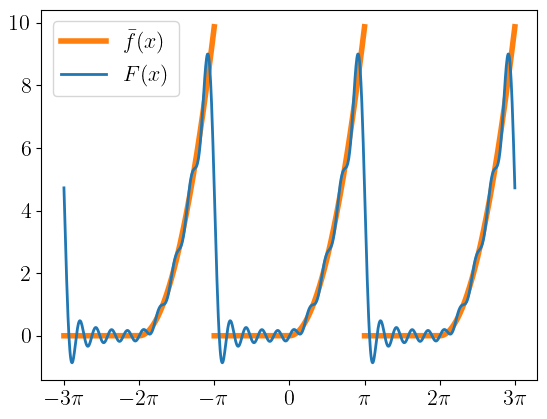

In [22]:
fig, ax = plt.subplots() 
x_n = np.linspace(-np.pi, np.pi, 300)
x_ext = np.linspace(-3 * np.pi, 3 * np.pi, 1000)
y = f_np(x_n)
Y = F_np(x_ext)
plt.plot(x_n, y, lw=4, c='tab:orange', label=r"$\bar{f}(x)$")
plt.plot(x_n + 2 * np.pi, y, c='tab:orange', lw=4) # extensión de f en (pi, 3 pi)
plt.plot(x_n - 2 * np.pi, y, c='tab:orange', lw=4) # extensión de f en (-3 pi, -pi)
plt.plot(x_ext, Y, label=r"$F(x)$")
ax.set_xticks([-3 * np.pi, -2 * np.pi, -np.pi, 0, np.pi, 2 * np.pi, 3 * np.pi])
ax.set_xticklabels(['$-3 \pi$', '$-2 \pi$','$-\pi$','$0$', '$\pi$', '$2 \pi$','$3 \pi$'])
plt.legend()
plt.show()

Podemos observar que aún tomando varios términos en la suma de $F(x)$, a la representación en serie de Fourier le cuesta aproximarse a $f(x)$ en la cercanía de las discontinuidades. En cualquier caso, haciendo el esfuerzo de imaginar que con suficientes términos de la suma nos acercamos tanto como queremos a $f(x)$ (es decir, $F(x)$ **converge** a $f(x)$ ), podemos ver que
$$ F(\pi) = \frac{\bar{f}(\pi^+) + \bar{f}(\pi^-)}{2} = \frac{0 + \pi^2}{2} $$
o 
$$ F(\pi) = \frac{\pi}{2} $$

### Parte c)

Ahora volvemos a (5.6) y recordamos que en $(-\pi, \pi)$, $f(x) \equiv F(x)$, pero $F(\pi) = \tfrac{\pi^2}{2}$, y si observamos que $\sin n \pi = 0$, obtenemos a partir de (5.6) que
$$ \underbrace{F(\pi)}_{\frac{\pi^2}{2}} = \frac{\pi^2}{6} + \sum_{n = 1}^{\infty} \frac{2 (-1)^n}{n^2} (-1)^n + 0 $$
Entonces
$$ \frac{\pi^2}{2} = \frac{\pi^2}{6} + \sum_{n = 1}^{\infty} \frac{2 (-1)^n}{n^2} (-1)^n + 0 $$
o, dado que $(-1)^n (-1)^n = (-1)^{2n} = 1$,
$$ \frac{\pi^2}{2} = \frac{\pi^2}{6} + \sum_{n = 1}^{\infty} \frac{2}{n^2} $$
resulta
$$ \frac{\pi^2}{3} = 2 \sum_{n = 1}^{\infty} \frac{1}{n^2} $$
o
$$ \frac{\pi^2}{6} = \sum_{n = 1}^{\infty} \frac{1}{n^2} $$
Esto es
$$ 1 + \frac{1}{4} + \frac{1}{9} + \cdots +  + \frac{1}{n^2} + \cdots = \frac{\pi^2}{6} $$

**Nota:** este es el primer ejercicio en el que encontramos la serie de Fourier de una función $f(x)$ que no es ni par ni impar. Por esta razón, la solución contiene tanto términos con senos y con cosenos. Si queremos ver qué parte de la solución proviene de los términos con senos y cuál es la que proviene de los cosenos, necesitamos observar que los senos provienen de la parte par de $f$, mientras que los cosenos de la impar. Por la parte par de $f$ nos referimos a 
$$f_{\text{par}} = \frac{f(x) + f(-x)}{2} $$
y por la impar a
$$f_{\text{impar}} = \frac{f(x) - f(-x)}{2} $$

Los invitamos a desarrollar estas funciones y graficarlas para ver qué relación tienen con $f$.

## Ejercicio 6

El paso clave para obtener la ortogonalidad de $\{\sin nx, \cos mx\}$ reside en el hecho que
$$\left. \sin(m \pm n)x \right|_{x = -\pi}^{\pi} = 0 $$

Si ahora reemplazamos $[-\pi, \pi]$ por $[-p, p]$, el producto interno involucra expresiones como
$$\left. \sin(m \pm n)x \right|_{x = -p}^{p} $$
El problema es que $\sin(m \pm n) p$ no necesariamente es cero.

Si queremos obtener que $\sin(m \pm n) p$ sea cero, es fácil conjeturar que sería bueno tener un factor $\tfrac{\pi}{p}$ como argumento del seno. Esto es:
$$ \sin \frac{\pi}{p}(m \pm n) p = \sin(m \pm n) \pi = 0 $$

Esto sugiere que si queremos la serie de Fourier de $f(x)$ en el intervalo $[-p, p]$, esta serie debe tener la forma
\begin{equation}
f(x) \sim a_0 + \sum_{n = 1}^{\infty} a_n \cos \frac{n \pi x}{p} + \sum_{n = 1}^{\infty} b_n \sin \frac{n \pi x}{p} 
\tag{6.1}
\end{equation}

Una verificación similar a la usada en el ejercicio 1 muestra que
$$ \{1, \cos \frac{\pi x}{p}, \cos \frac{2 \pi x}{p}, \ldots, \cos \frac{n \pi x}{p}, \ldots, \sin  \frac{\pi x}{p}, \sin \frac{2 \pi x}{p}, \ldots, \sin \frac{n \pi x}{p}, \ldots \} $$
es ortogonal en $[-p, p]$.

Además, si calculamos $\langle 1, 1 \rangle$, $\langle \cos \frac{n \pi x}{p}, \cos \frac{n \pi x}{p} \rangle$ y $\langle \sin \frac{n \pi x}{p}, \sin \frac{n \pi x}{p} \rangle$ (integrando los productos internos en $[-p, p]$, tenemos

In [23]:
x, p = symbols('x p', real=True)
n = symbols('n', integer=True, positive=True)

In [24]:
integrate(1, (x, -p, p))

2*p

In [25]:
integrate(cos(pi * n * x / p)**2, (x, -p, p))

p

In [26]:
integrate(sin(pi * n * x / p)**2, (x, -p, p))

p

De estos resultados vemos que $p$ reemplaza a $\pi$ cuando el intervalo cambia de $[-\pi, \pi]$ a $[-p, p]$. Entonces, si $f(x)$ es integrable en $[-p, p]$, la serie de Fourier de $f(x)$, $F(x)$, está dada por
\begin{equation}
F(x) = a_0 + \sum_{n = 1}^{\infty} a_n \cos \frac{n \pi x}{p} + \sum_{n = 1}^{\infty} b_n \sin \frac{n \pi x}{p} 
\tag{6.2}
\end{equation}
donde
\begin{equation}
a_0 = \frac{1}{2p} \int_{-p}^p f(x) \, dx
\tag{6.3}
\end{equation}

\begin{equation}
a_n (\text{ para } n \neq 0) = \frac{1}{p} \int_{-p}^p f(x) \, \cos \frac{n \pi x}{p} \, dx
\tag{6.4}
\end{equation}

\begin{equation}
b_n = \frac{1}{p} \int_{-p}^p f(x) \, \sin \frac{n \pi x}{p} \, dx
\tag{6.5}
\end{equation}

En este contexto, el problema presenta el caso especial en que $p = 1$ y $f(x) = x$. Bajo estas condiciones, se deduce de (6.3), (6.4) y (6.5) que
$$ a_0 = a_1 = \cdots = a_n = \cdots = 0 $$
debido a que $f(x)$ es una función impar (y por lo tanto $f(x) cos \tfrac{n \pi x}{p}$ también es impar). Hacemos la integral sobre los senos con SymPy:

In [27]:
integrate(x * sin(pi * n * x), (x, -1, 1))

-2*(-1)**n/(pi*n)

Poniendo estos resultados en (6.2) obtenemos
$$ F(x) = \sum_{n = 1}^{\infty} \frac{2 (-1)^{n + 1}}{n \pi} \sin n \pi x $$
o
\begin{equation}
F(x) = \frac{2}{\pi} \sum_{n = 1}^{\infty} (-1)^{n + 1} \frac{\sin n \pi x}{n} 
\tag{6.6}
\end{equation}

Nuevamente, verificamos este resultado usando la expansión en serie de Fourier que ofrece SymPy:

In [28]:
f = x 
F = fourier_series(f, (x, -1, 1))
F

FourierSeries(x, (x, -1, 1), (0, SeqFormula(0, (_k, 1, oo)), SeqFormula(Piecewise((-2*cos(_n*pi)/(_n*pi) + 2*sin(_n*pi)/(_n**2*pi**2), (_n > -oo) & (_n < oo) & Ne(_n, 0)), (0, True))*sin(_n*pi*x), (_n, 1, oo))))

Realizamos una comparación gráfica considerando solo los primeros 5 términos de la representación en serie de Fourier:

In [29]:
f_np = lambdify(x, f, 'numpy')
F_np = lambdify(x, F.truncate(n=5), 'numpy')  # tomamos los primeros 5 términos de la serie de Fourier

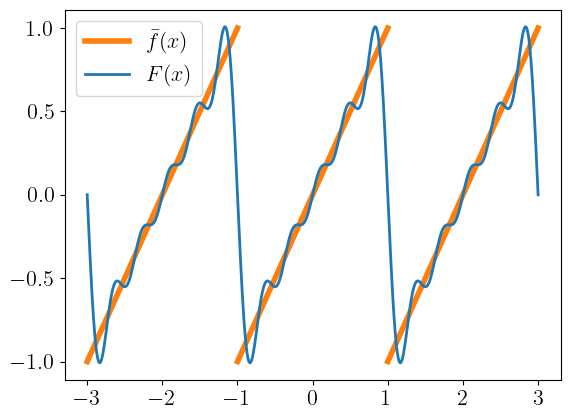

In [30]:
fig, ax = plt.subplots() 
x_n = np.linspace(-1, 1, 300)
x_ext = np.linspace(-3, 3, 1000)
y = f_np(x_n)
Y = F_np(x_ext)
plt.plot(x_n, y, lw=4, c='tab:orange', label=r"$\bar{f}(x)$")
plt.plot(x_n + 2, y, c='tab:orange', lw=4) # extensión de f en (pi, 3 pi)
plt.plot(x_n - 2, y, c='tab:orange', lw=4) # extensión de f en (-3 pi, -pi)
plt.plot(x_ext, Y, label=r"$F(x)$")
ax.set_xticks([-3, -2, -1, 0, 1, 2, 3])
ax.set_xticklabels(['$-3$', '$-2$','$-1$','$0$', '$1$', '$2$','$3$'])
plt.legend()
plt.show()

In [31]:
x = symbols('x', real=True)
n = symbols('n', integer=True, positive=True)

In [32]:
a_0 = 1/2 * (integrate(1, (x, 0, 2)) + integrate(3 - x, (x, 2, 3))  + integrate(x - 3, (x, 3, 4)) )
a_0

1.50000000000000

In [33]:
a_n = 1/2 * (integrate(1 * cos(n * pi * x /2), (x, 0, 2)) + integrate((3 - x) * cos(n * pi * x /2), (x, 2, 3))  + integrate((x - 3) * cos(n * pi * x /2), (x, 3, 4)) )
a_n

2.0*(-1)**n/(pi**2*n**2) - 4.0*cos(3*pi*n/2)/(pi**2*n**2) + 2.0/(pi**2*n**2)

In [34]:
b_n = 1/2 * (integrate(1 * sin(n * pi * x /2), (x, 0, 2)) + integrate((3 - x) * sin(n * pi * x /2), (x, 2, 3))  + integrate((x - 3) * sin(n * pi * x /2), (x, 3, 4)) )
b_n

-4.0*sin(3*pi*n/2)/(pi**2*n**2)